In [2]:
# Pull in relevant libraries
import pandas as pd
import dask.dataframe as ddf
import dask as dd
import numpy as np

from matplotlib import style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Pull in hospital readmission rates and the SDI info for each ZCTA
df_rate_radm=pd.read_csv('df_rate_radm.csv')
df_sdi=pd.read_csv('zip2sdi.csv')

In [5]:
df_combine=df_sdi.loc[:,['zcta',
                         'population',
                         'sdi_score',
                         'black_score',
                         'hisp_score']].merge(df_rate_radm.loc[:,['zcta',
                                                                  'radm_rate']],
                                              how='left').fillna(0)

df_combine=df_combine.fillna(0)

df_combine=df_combine.loc[~(df_combine.zcta==0)]

In [6]:
df_combine

,zcta,population,sdi_score,black_score,hisp_score,radm_rate
0,1001,17438,33.0,21.0,43.0,0.0
1,1002,29780,65.0,49.0,43.0,0.0
2,1003,11241,65.0,55.0,34.0,0.0
3,1005,5201,23.0,15.0,7.0,0.0
4,1007,14838,25.0,15.0,15.0,0.0
...,...,...,...,...,...,...
32984,99923,13,70.0,1.0,1.0,0.0
32985,99925,826,76.0,17.0,25.0,0.0
32986,99926,1711,67.0,1.0,48.0,0.0
32987,99927,123,27.0,1.0,1.0,0.0


Text(0.5, 0, 'Readmission Rate')

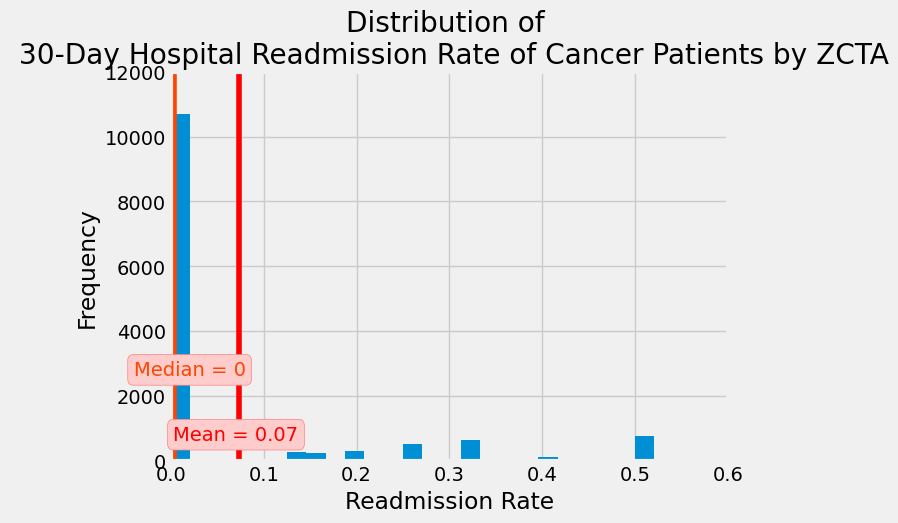

In [7]:
plt=df_rate_radm['radm_rate'].plot(kind='hist', 
                             title='Distribution of \n 30-Day Hospital Readmission Rate of Cancer Patients by ZCTA',
                             xlim=[0,0.6],
                                   ylim=[0,12000],
                             bins=40)
plt.text(x=0.07, y=800, s='Mean = 0.07', color='r',ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.axvline(x=df_rate_radm['radm_rate'].mean(), 
           color='r')

plt.text(x=0.02, y=2800, s='Median = 0', color='orangered',ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.axvline(x=0.003, 
           color='orangered')

plt.set_xlabel("Readmission Rate")

In [8]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'